In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

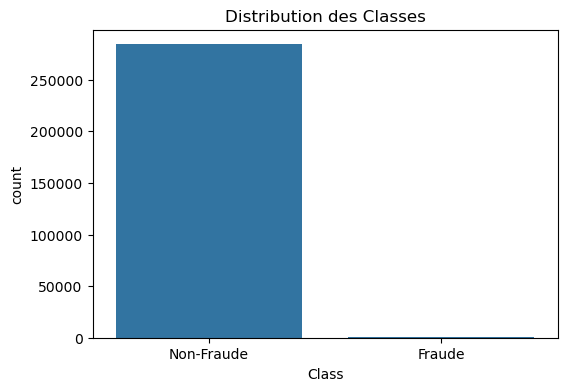

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data)
plt.title('Distribution des Classes')
plt.xticks([0,1], ['Non-Fraude', 'Fraude'])
plt.show()

In [7]:
# Calcul des pourcentages de chaque classe
class_counts = data['Class'].value_counts()
class_percentages = data['Class'].value_counts(normalize=True) * 100
print(class_counts)
print(class_percentages)


Class
0    284315
1       492
Name: count, dtype: int64
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [8]:
# Calcul des pourcentages de chaque classe
class_counts = data['Class'].value_counts()
class_percentages = data['Class'].value_counts(normalize=True) * 100
print(class_counts)
print(class_percentages)


Class
0    284315
1       492
Name: count, dtype: int64
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


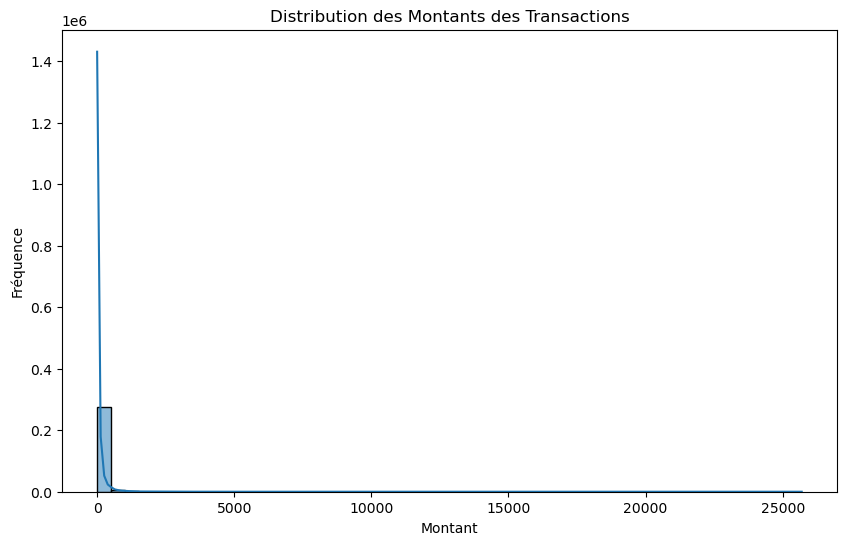

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution des Montants des Transactions')
plt.xlabel('Montant')
plt.ylabel('Fréquence')
plt.show()


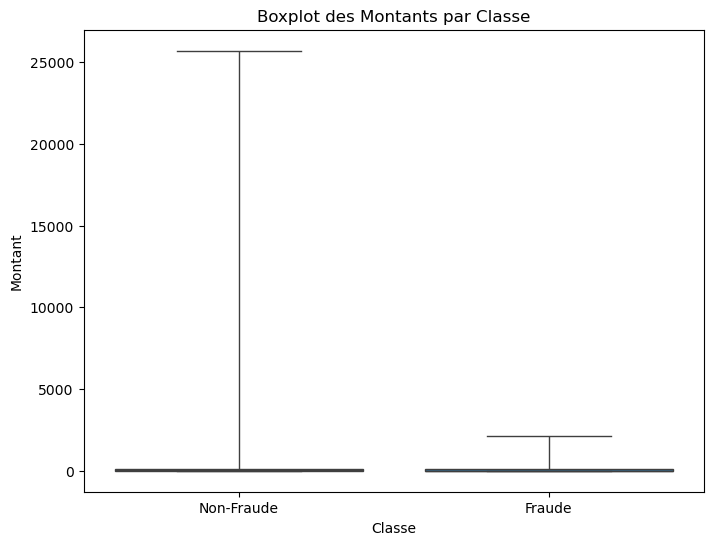

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Class', y='Amount', data=data, whis=1000)
plt.title('Boxplot des Montants par Classe')
plt.xlabel('Classe')
plt.ylabel('Montant')
plt.xticks([0,1], ['Non-Fraude', 'Fraude'])
plt.show()


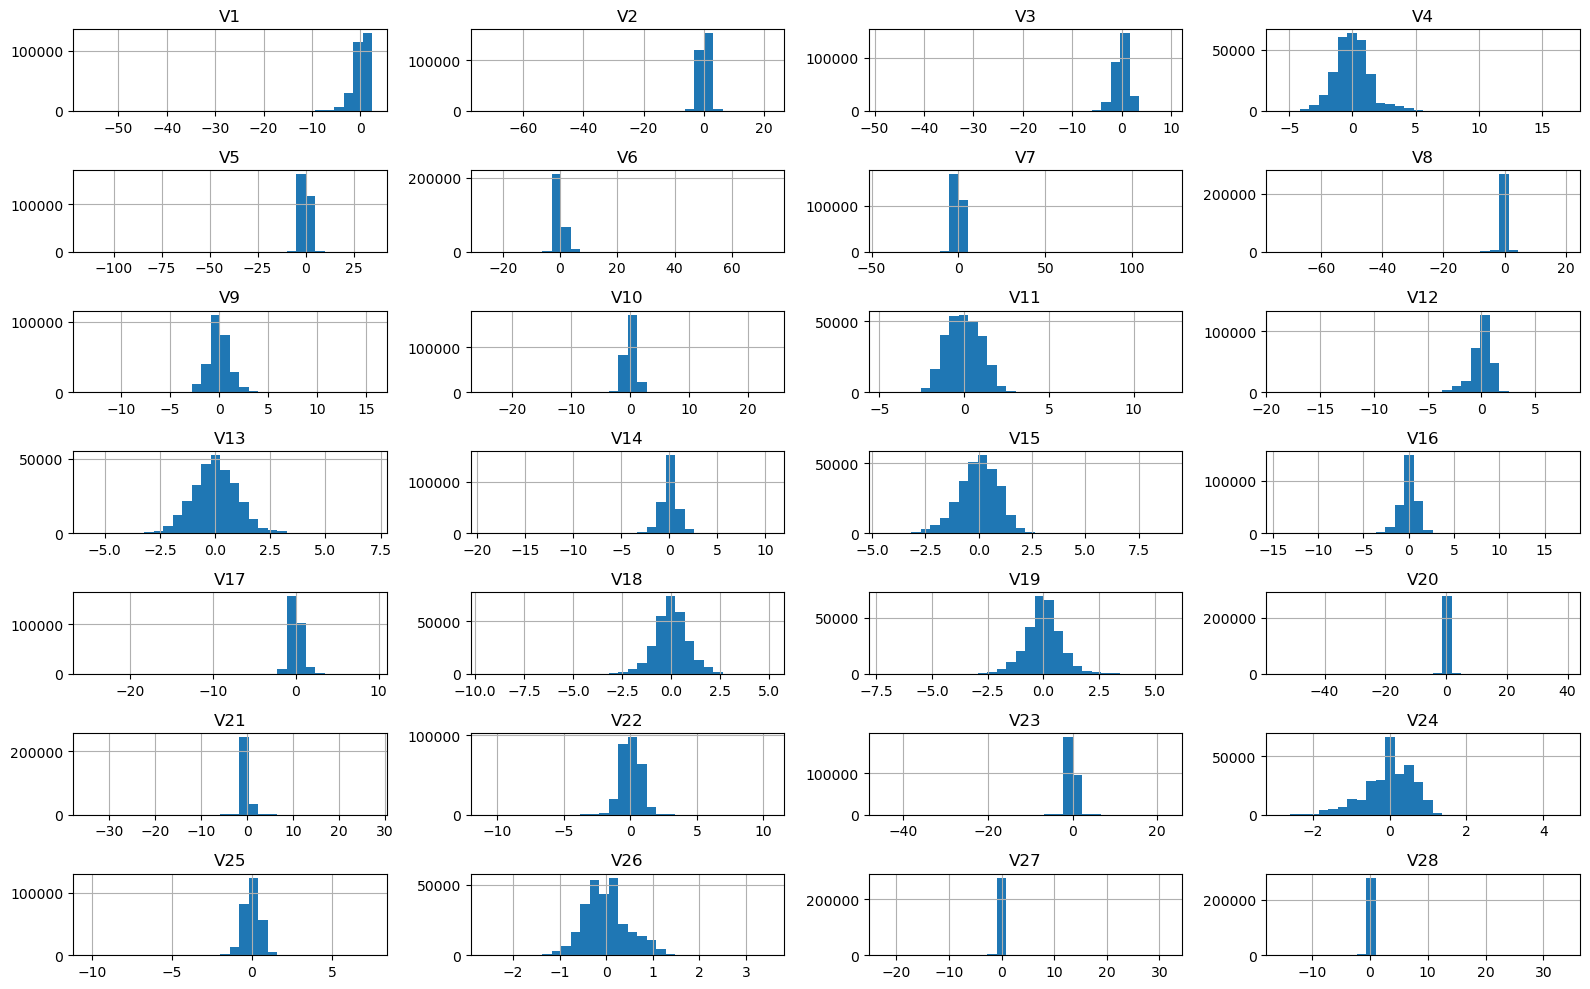

In [15]:
# Liste des variables anonymisées
features = [f'V{i}' for i in range(1,29)]

# Distribution des variables anonymisées
data[features].hist(bins=30, figsize=(16,10), layout=(7,4))
plt.tight_layout()
plt.show()


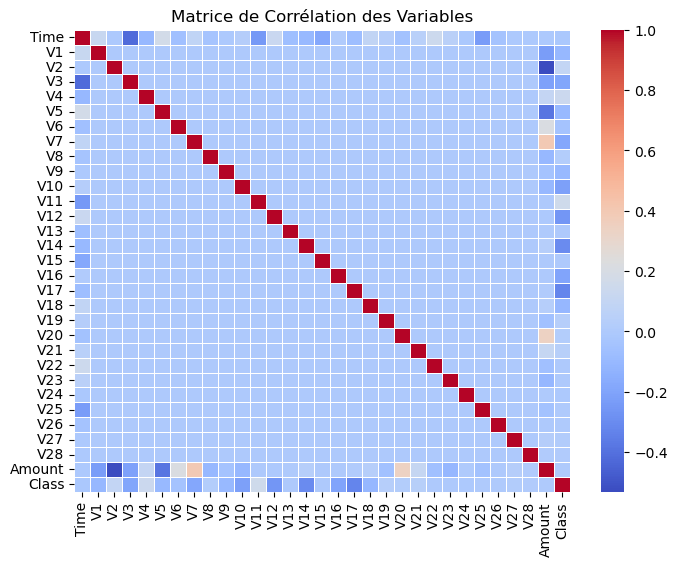

In [17]:
# Calcul de la matrice de corrélation
corr_matrix = data.corr()

# Taille de la figure
plt.figure(figsize=(8,6))

# Heatmap de la matrice de corrélation
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5, annot=False)
plt.title('Matrice de Corrélation des Variables')
plt.show()


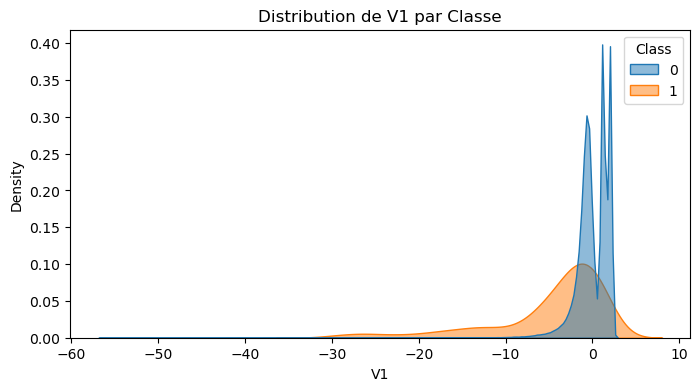

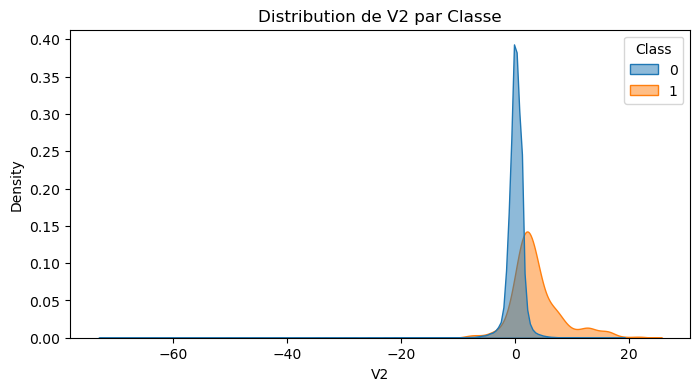

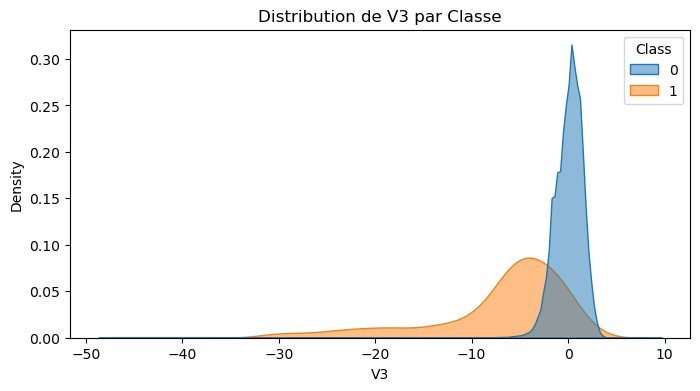

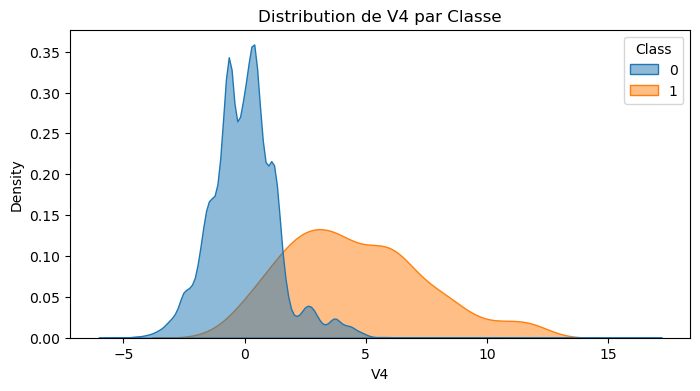

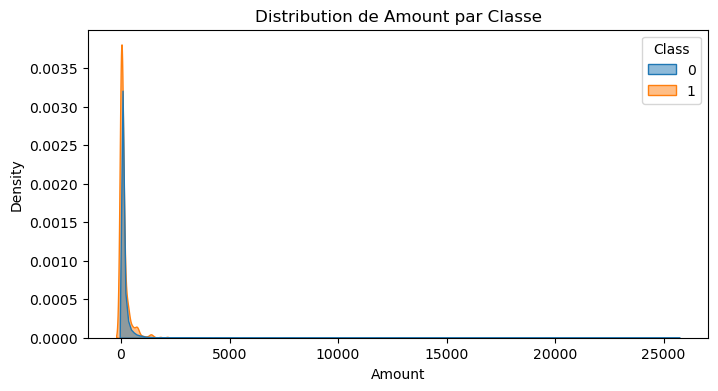

In [19]:
# Sélection de quelques variables pour l'analyse
selected_features = ['V1', 'V2', 'V3', 'V4', 'Amount']

# Création de graphiques de distribution pour chaque variable sélectionnée
for feature in selected_features:
    plt.figure(figsize=(8,4))
    sns.kdeplot(data=data, x=feature, hue='Class', fill=True, common_norm=False, alpha=0.5)
    plt.title(f'Distribution de {feature} par Classe')
    plt.show()


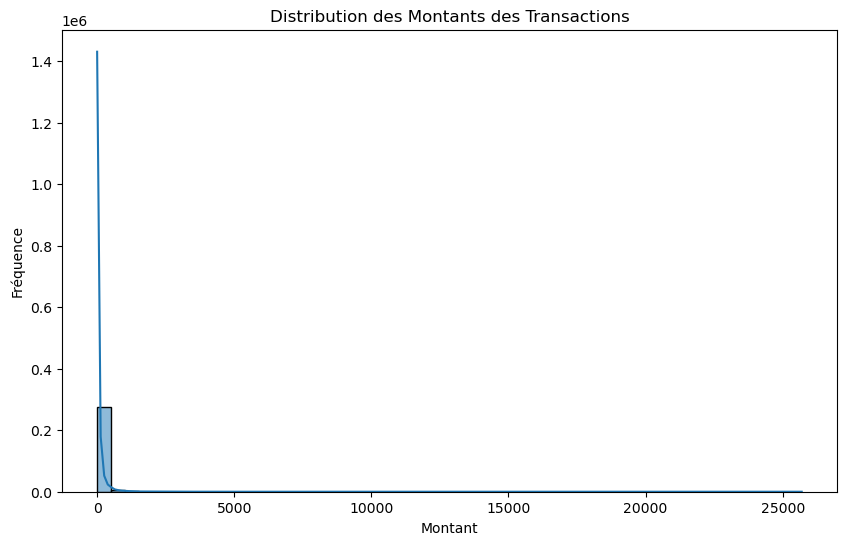

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution des Montants des Transactions')
plt.xlabel('Montant')
plt.ylabel('Fréquence')
plt.show()


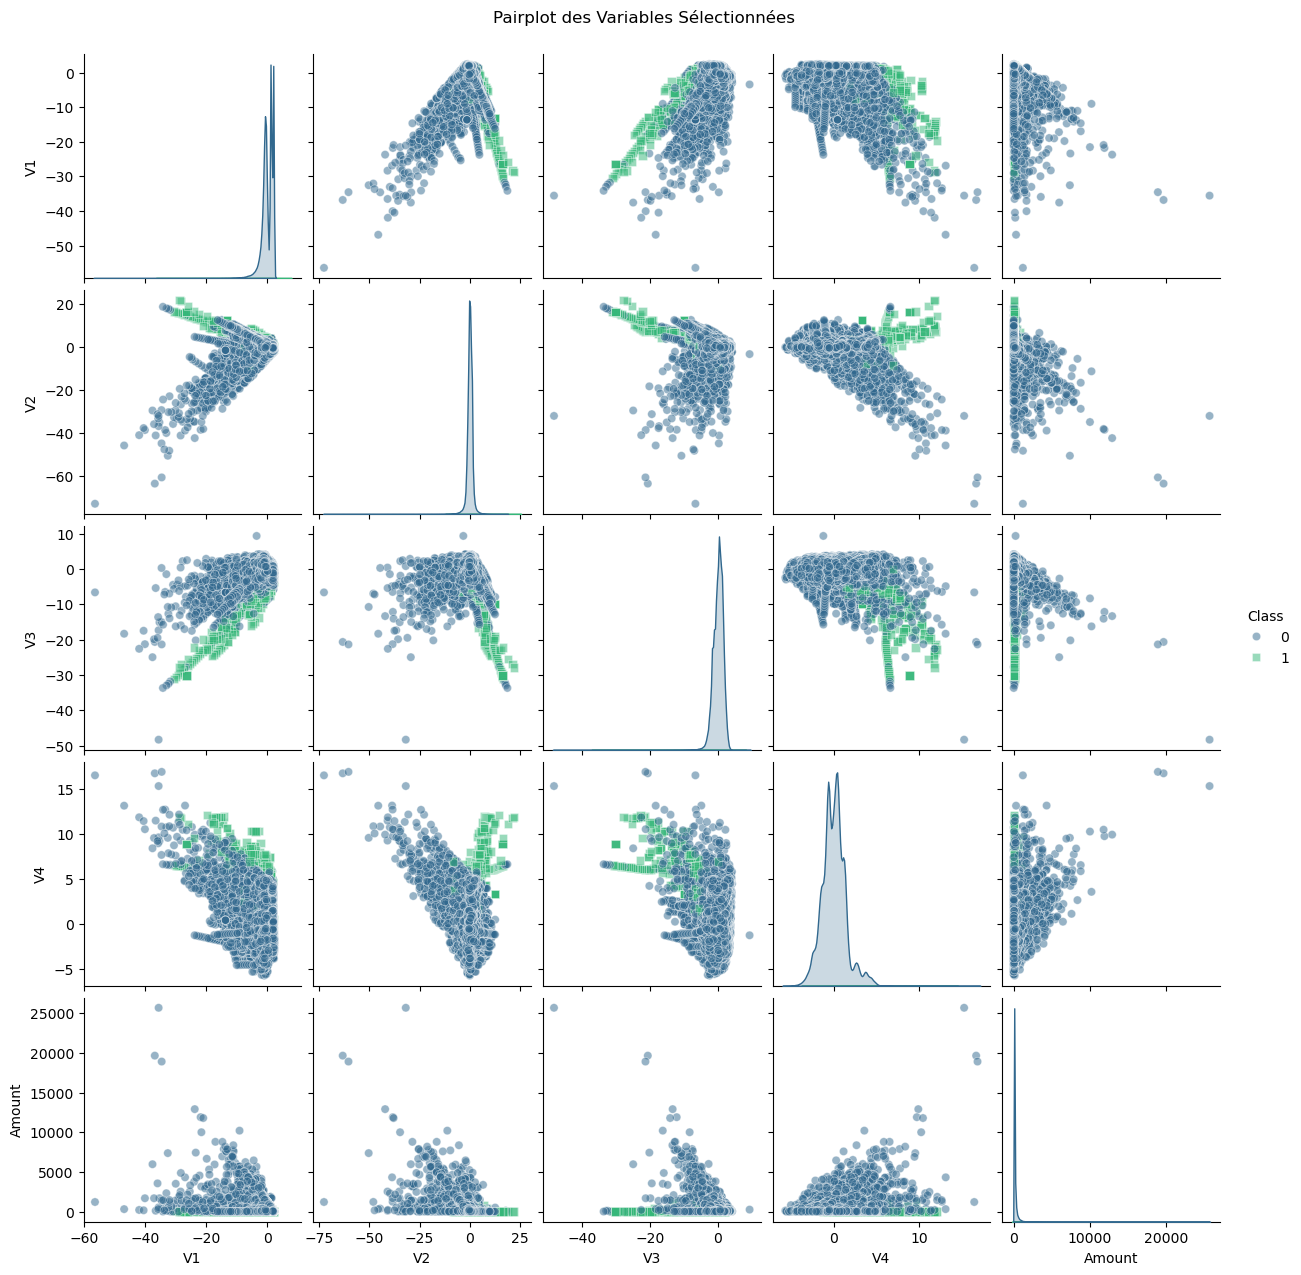

In [20]:
# Pairplot des variables sélectionnées
sns.pairplot(data, vars=selected_features, hue='Class', palette='viridis', markers=["o", "s"], plot_kws={'alpha':0.5})
plt.suptitle('Pairplot des Variables Sélectionnées', y=1.02)
plt.show()
